# EDA & Preprocessing Dataset Chatbot Administrasi Kependudukan

Notebook ini berisi analisis data eksploratif dan preprocessing untuk chatbot seq2seq pelayanan publik administrasi kependudukan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import unicodedata
from nltk.corpus import stopwords
import string
import nltk

nltk.download('stopwords')

# Baca data
df = pd.read_csv('../dataset.csv')
df.head()

,pertanyaan,jawaban,referensi
0,hi,"halo, ada yang bisa dibantu?",NaN
1,halo,"halo, ada yang bisa dibantu?",NaN
2,hai,"halo, ada yang bisa dibantu?",NaN
3,Bagaimana cara pengajuan KK baru bagi yang bar...,Permohonan dapat diajukan online melalui sipen...,https://disdukcapil.pekanbaru.go.id/page/203-faq
4,Bagaimana cara pengajuan cetak KTP hilang?,Ajukan secara online via aplikasi Layanan Tung...,https://disdukcapil.pekanbaru.go.id/page/203-faq


## 1. Info Data dan Cek Missing Value

In [2]:
df.info()
print('---')
print('Missing values:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pertanyaan  236 non-null    object
 1   jawaban     236 non-null    object
 2   referensi   232 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB
---
Missing values:
pertanyaan    0
jawaban       0
referensi     4
dtype: int64


## 2. Cek Duplikasi

In [3]:
print('Jumlah data sebelum drop duplikasi:', len(df))
df = df.drop_duplicates(subset=['pertanyaan', 'jawaban'])
print('Jumlah data setelah drop duplikasi:', len(df))

Jumlah data sebelum drop duplikasi: 236
Jumlah data setelah drop duplikasi: 226


## 3. Distribusi Panjang Teks Pertanyaan & Jawaban

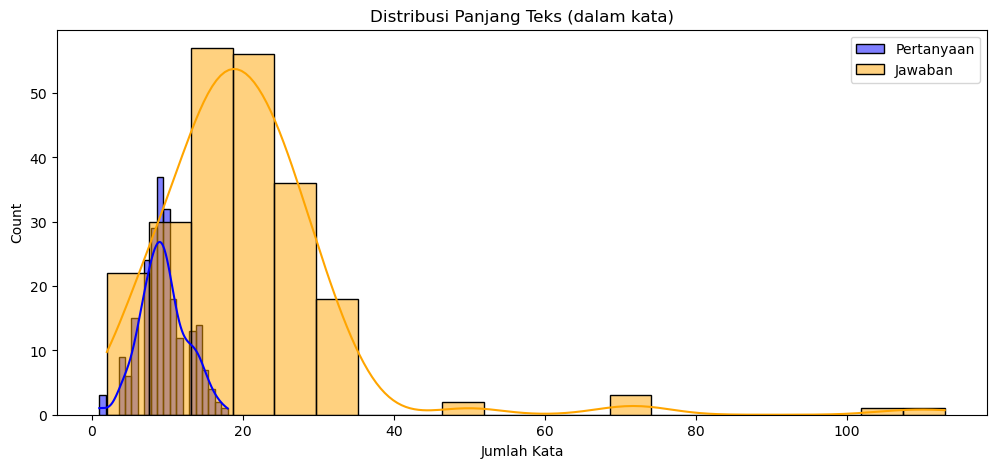

In [4]:
df['len_pertanyaan'] = df['pertanyaan'].astype(str).apply(lambda x: len(x.split()))
df['len_jawaban'] = df['jawaban'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(12,5))
sns.histplot(df['len_pertanyaan'], bins=20, kde=True, color='blue', label='Pertanyaan')
sns.histplot(df['len_jawaban'], bins=20, kde=True, color='orange', label='Jawaban')
plt.legend()
plt.title('Distribusi Panjang Teks (dalam kata)')
plt.xlabel('Jumlah Kata')
plt.show()

## 4. Preprocessing Teks

# Preprocessing profesional: lowercase, hapus tanda baca, hapus spasi berlebih, normalisasi unicode, dan hapus stopwords



# Fungsi preprocessing


# Terapkan ke kolom pertanyaan dan jawaban


In [ ]:
stop_words = set(stopwords.words('indonesian'))

def clean_text_pro(text):
    # Lowercase
    text = str(text).lower()
    # Normalisasi unicode
    text = unicodedata.normalize('NFKC', text)
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    # Hapus stopwords
    tokens = text.strip().split()
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['pertanyaan_clean'] = df['pertanyaan'].apply(clean_text_pro)
df['jawaban_clean'] = df['jawaban'].apply(clean_text_pro)
df[['pertanyaan', 'pertanyaan_clean', 'jawaban', 'jawaban_clean']].head()